<a href="https://colab.research.google.com/github/PomazkinG/Particle/blob/master/Particle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install yfinance

In [52]:
!pip install pyramid-arima

In [0]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab 
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima

Q1

In [54]:
stock_list = ['NFLX', 'GS', 'MSFT']
df_daily_price = yf.download(stock_list, 
                      period = '10y',
                      progress=False)
df_daily_price = df_daily_price['Close']
df_daily_price.tail()

,GS,MSFT,NFLX
Date,,,
2020-04-20,180.399994,175.059998,437.489990
2020-04-21,173.809998,167.820007,433.829987
2020-04-22,175.979996,173.520004,421.420013
2020-04-23,175.050003,171.419998,426.700012
2020-04-24,177.000000,174.550003,424.989990


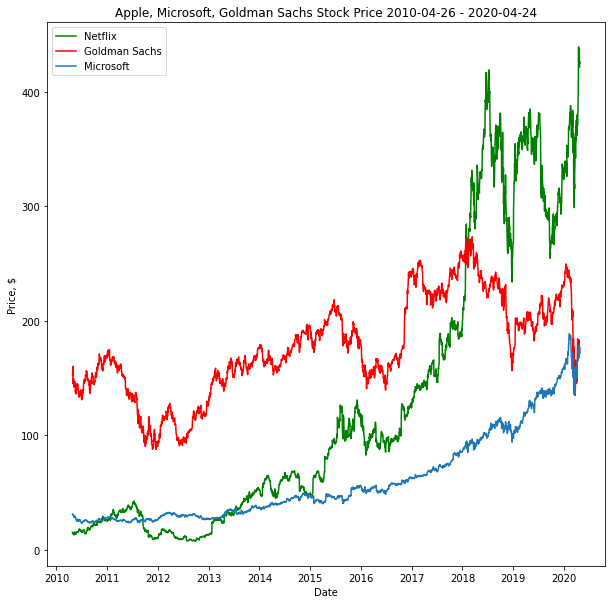

In [55]:
plt.figure(figsize=(10,10))
plt.plot(df_daily_price['NFLX'], 'g', label="Netflix")
plt.plot(df_daily_price['GS'], 'r', label="Goldman Sachs")
plt.plot(df_daily_price['MSFT'], label="Microsoft")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price, $')
plt.title('Apple, Microsoft, Goldman Sachs Stock Price 2010-04-26 - 2020-04-24')
plt.show()

Q2

In [56]:
df_daily_return = df_daily_price.pct_change()
df_daily_return.tail()

,GS,MSFT,NFLX
Date,,,
2020-04-20,-0.016840,-0.019821,0.034353
2020-04-21,-0.036530,-0.041357,-0.008366
2020-04-22,0.012485,0.033965,-0.028606
2020-04-23,-0.005285,-0.012102,0.012529
2020-04-24,0.011140,0.018259,-0.004008


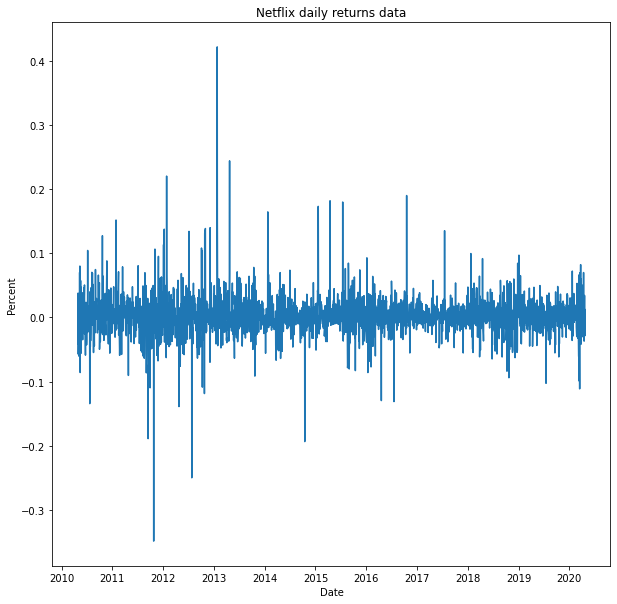

In [57]:
plt.figure(figsize=(10,10))
plt.plot(df_daily_return['NFLX'])
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix daily returns data")
plt.show()

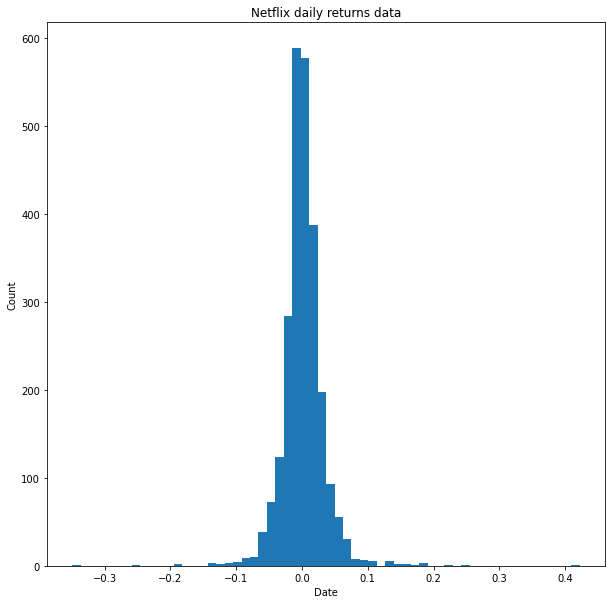


 Mean = 0.0018 
 St. Deviation = 0.0327 
 Variance = 0.0011 
 Skewness = 0.7468 
 Excess Kurtosis = 22.9868


In [58]:
plt.figure(figsize=(10,10))
df_daily_return['NFLX'].plot.hist(bins = 60)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Netflix daily returns data")
plt.show()
print('\n','Mean =', round(np.mean(df_daily_return['NFLX'].dropna()),4), '\n',
'St. Deviation =', round(np.std(df_daily_return['NFLX'].dropna()),4), '\n',
'Variance =',round(np.std(df_daily_return['NFLX'].dropna())**2,4), '\n',
'Skewness =',round(skew(df_daily_return['NFLX'].dropna()),4), '\n',
'Excess Kurtosis =',round(kurtosis(df_daily_return['NFLX'].dropna()),4),
)

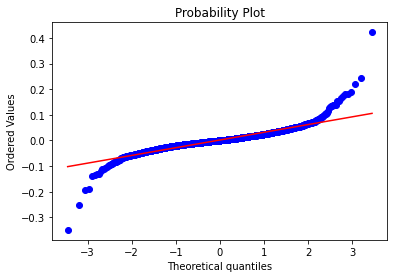

P-value = 7.286752014489049e-44


In [59]:
stats.probplot(df_daily_return['NFLX'].dropna(), dist="norm", plot=pylab)
pylab.show()
print('P-value =', stats.shapiro(df_daily_return['NFLX'].dropna())[1])

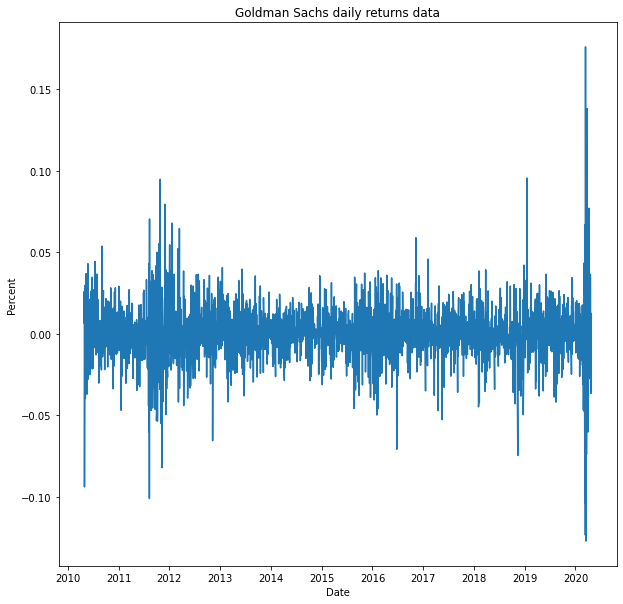

In [60]:
plt.figure(figsize=(10,10))
plt.plot(df_daily_return['GS'])
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Goldman Sachs daily returns data")
plt.show()

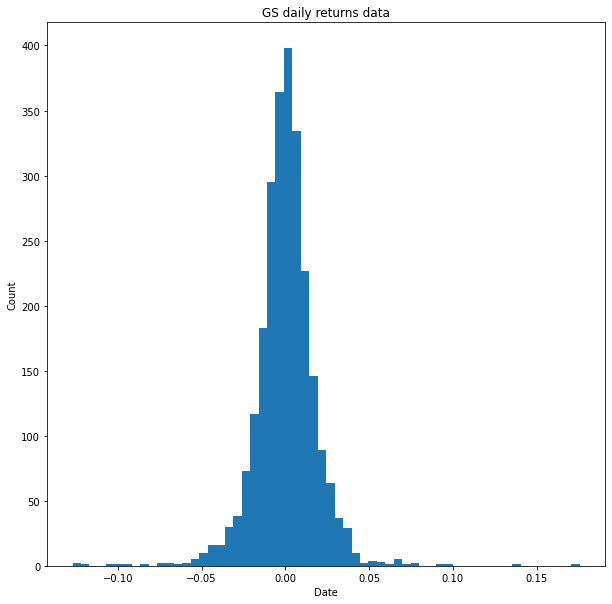


 Mean = 0.0002 
 St. Deviation = 0.018 
 Variance = 0.0003 
 Skewness = 0.0411 
 Excess Kurtosis = 10.0407


In [61]:
plt.figure(figsize=(10,10))
df_daily_return['GS'].plot.hist(bins = 60)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("GS daily returns data")
plt.show()
print('\n','Mean =', round(np.mean(df_daily_return['GS'].dropna()),4), '\n',
'St. Deviation =', round(np.std(df_daily_return['GS'].dropna()),4), '\n',
'Variance =',round(np.std(df_daily_return['GS'].dropna())**2,4), '\n',
'Skewness =',round(skew(df_daily_return['GS'].dropna()),4), '\n',
'Excess Kurtosis =',round(kurtosis(df_daily_return['GS'].dropna()),4),
)

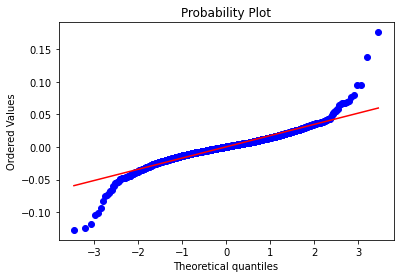

P-value = 2.201726173851588e-35


In [62]:
stats.probplot(df_daily_return['GS'].dropna(), dist="norm", plot=pylab)
pylab.show()
print('P-value =', stats.shapiro(df_daily_return['GS'].dropna())[1])

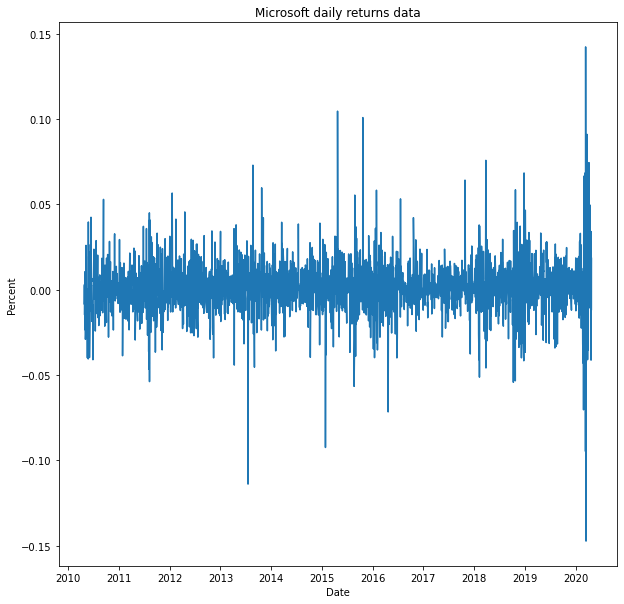

In [63]:
plt.figure(figsize=(10,10))
plt.plot(df_daily_return['MSFT'])
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Microsoft daily returns data")
plt.show()

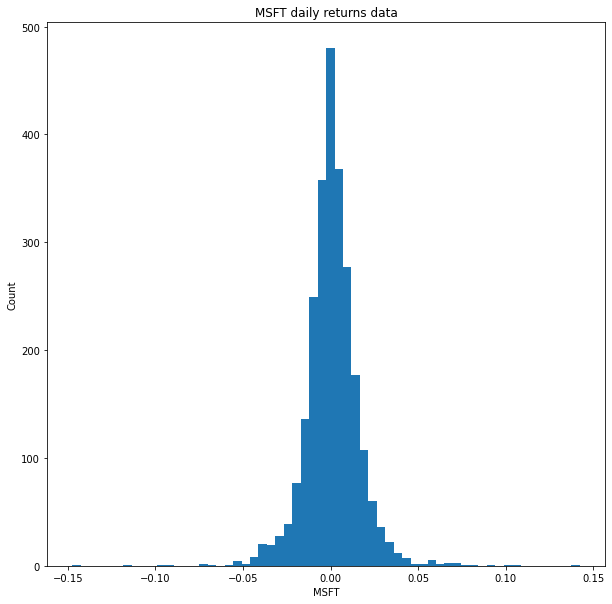


 Mean = 0.0008 
 St. Deviation = 0.0159 
 Variance = 0.0003 
 Skewness = 0.1001 
 Excess Kurtosis = 10.8521


In [64]:
plt.figure(figsize=(10,10))
df_daily_return['MSFT'].plot.hist(bins = 60)
plt.xlabel("MSFT")
plt.ylabel("Count")
plt.title("MSFT daily returns data")
plt.show()
print('\n','Mean =', round(np.mean(df_daily_return['MSFT'].dropna()),4), '\n',
'St. Deviation =', round(np.std(df_daily_return['MSFT'].dropna()),4), '\n',
'Variance =',round(np.std(df_daily_return['MSFT'].dropna())**2,4), '\n',
'Skewness =',round(skew(df_daily_return['MSFT'].dropna()),4), '\n',
'Excess Kurtosis =',round(kurtosis(df_daily_return['MSFT'].dropna()),4),
)

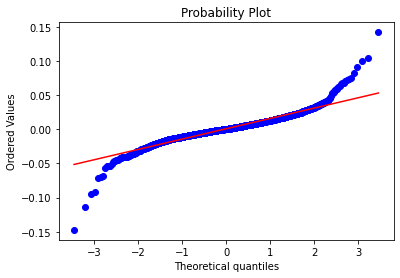

P-value = 2.809578533910532e-37


In [65]:
stats.probplot(df_daily_return['MSFT'].dropna(), dist="norm", plot=pylab)
pylab.show()
print('P-value =', stats.shapiro(df_daily_return['MSFT'].dropna())[1])

ADF Statistic = -18.5642080233979
P-value = 2.0858451736062324e-30
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


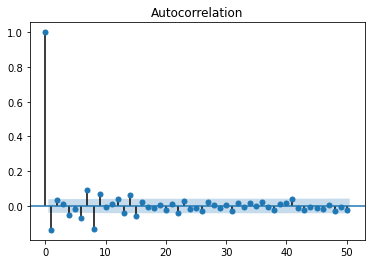

In [66]:
X = df_daily_return['MSFT'].dropna().values
plot_acf(X, lags = 50)
result = adfuller(X)
print('ADF Statistic =',result[0])
print('P-value =', result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [67]:
df_daily_return.corr()

,GS,MSFT,NFLX
GS,1.000000,0.542484,0.247575
MSFT,0.542484,1.000000,0.299617
NFLX,0.247575,0.299617,1.000000


Q3

In [0]:
N = 10 # length of random realization
df_daily_price.dropna(inplace=True)

In [0]:
MSE = np.empty(N, dtype=object)
hit_rate = np.empty(N, dtype=object)
MAD_R = np.empty(N, dtype=object)
MAD_F = np.empty(N, dtype=object)
SR = np.empty(N, dtype=object)

In [0]:
for i in range(N):
  df_daily_return['Prediction'] = np.random.normal(0,1,len(df_daily_return))
  df_daily_return['PNL'] = df_daily_return['Prediction'] * df_daily_return['MSFT']
  MSE[i] = np.sqrt(((df_daily_return['Prediction']  - df_daily_return['MSFT']) ** 2).mean())
  hit_rate[i] = np.sum(np.sign(df_daily_return['Prediction'] ) == np.sign(df_daily_return['MSFT']))/len(df_daily_return)
  MAD_R[i] = df_daily_return['MSFT'].mad()
  MAD_F[i] = df_daily_return['Prediction'].mad()
  SR[i] = df_daily_return['MSFT'].mean()/df_daily_return['MSFT'].std()
  df_daily_return.drop(columns=['Prediction', 'PNL'], inplace=True)